In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

import thesis
chapter = 'theory'
save = True

from thesis.constants import Delta
from scipy.constants import h, k as k_B, pi
from scipy.special import i0, k0

In [2]:
def upsilon_1(Delta0, T, f):
    xi = h * f / (2 * k_B * T)
    return ((8 * Delta0) / (pi**2 * k_B * T))**(1/2) * np.sinh(xi) * k0(xi)

def upsilon_2(Delta0, T, f):
    xi = h * f / (2 * k_B * T)
    return - (1 + (2 * Delta0) / (pi * k_B * T) * np.exp(-xi) * i0(xi))

In [3]:
linestyle_1p = '-'
linestyle_mc = '--'

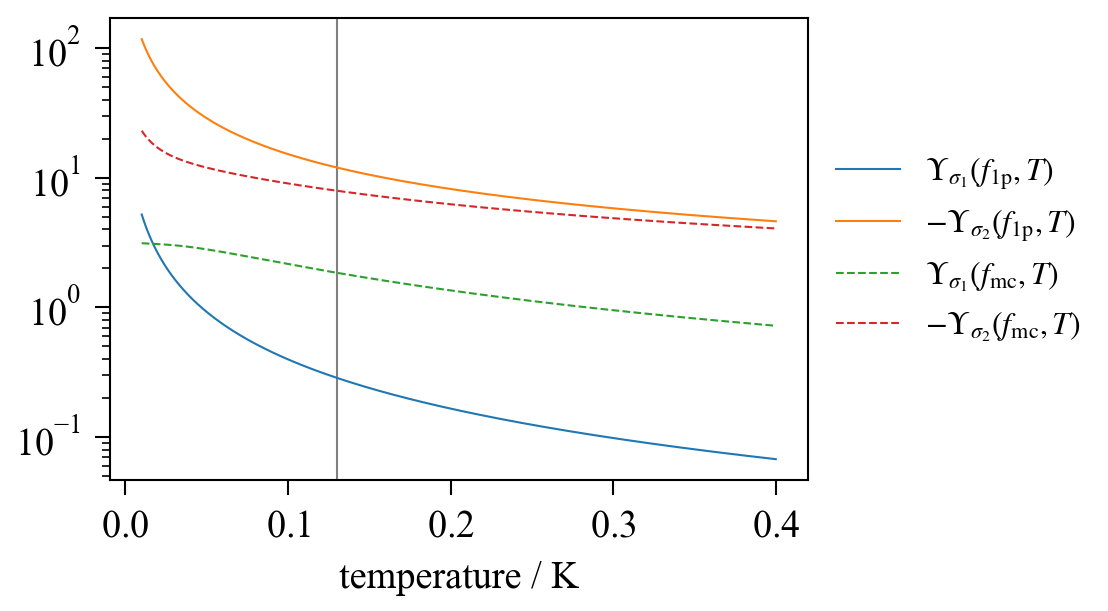

In [4]:
fig, ax = plt.subplots()
ax.set_xlabel('temperature / K')
ax.set_yscale('log')
ax.axvline(T_bath, color='gray')
TT = np.linspace(0.01, 0.4, 10000)
ax.plot(TT, upsilon_1(Delta, TT, f_1p),
        linestyle=linestyle_1p, label='$\Upsilon_{\sigma_1}(f_\mathrm{1p}, T)$')
ax.plot(TT, -upsilon_2(Delta, TT, f_1p),
        linestyle=linestyle_1p, label='$-\Upsilon_{\sigma_2}(f_\mathrm{1p}, T)$')
ax.plot(TT, upsilon_1(Delta, TT, f_mc),
        linestyle=linestyle_mc, label='$\Upsilon_{\sigma_1}(f_\mathrm{mc}, T)$')
ax.plot(TT, -upsilon_2(Delta, TT, f_mc),
        linestyle=linestyle_mc, label='$-\Upsilon_{\sigma_2}(f_\mathrm{mc}, T)$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')

if save:
    fig.savefig(thesis.full_filename(chapter, 'normresponse_conductivity_thermal.pdf'))